In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.svm import SVR
import statsmodels.api as sm
import datetime
import warnings

warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv('/content/drive/MyDrive/PTTK/VCB.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)
df = df.dropna() # Drop missing values

df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2016-01-04,23277.0,23600.0,23708.0,22953.0,1.31M,0.0
2016-01-05,22899.0,23115.0,23384.0,22846.0,1.95M,0.0
2016-01-06,23169.0,22899.0,23277.0,22899.0,1.20M,0.0
2016-01-07,22899.0,23061.0,23115.0,22630.0,1.61M,0.0
2016-01-08,22738.0,22792.0,22953.0,22468.0,1.17M,0.0
...,...,...,...,...,...,...
2023-12-21,80900.0,81000.0,81000.0,80300.0,2.03M,0.0
2023-12-22,80900.0,80900.0,81100.0,80400.0,1.58M,0.0
2023-12-25,81800.0,80900.0,81800.0,80700.0,1.30M,0.0


<Axes: xlabel='Date'>

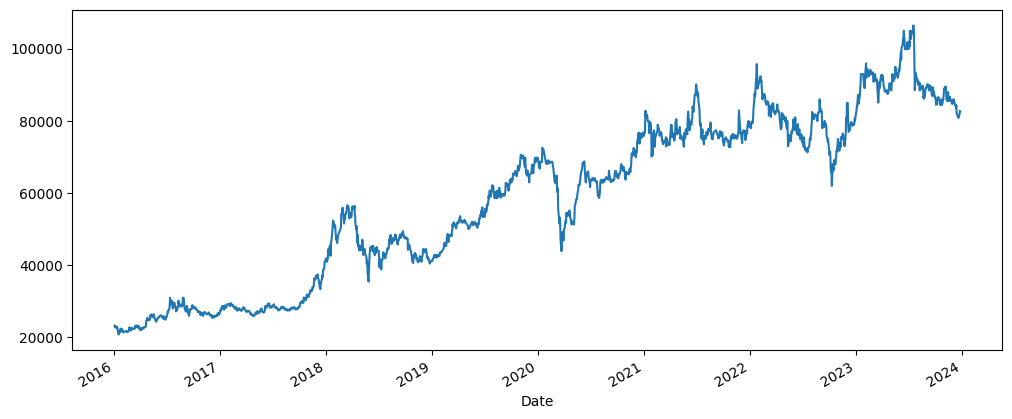

In [54]:
df['Price'].plot(figsize=(12,5))

In [55]:
# Perform Augmented Dickey-Fuller test
result = adfuller(np.diff(df['Price']))

# Extract and print the test statistics and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -27.476403312899983
p-value: 0.0


<Axes: xlabel='Date'>

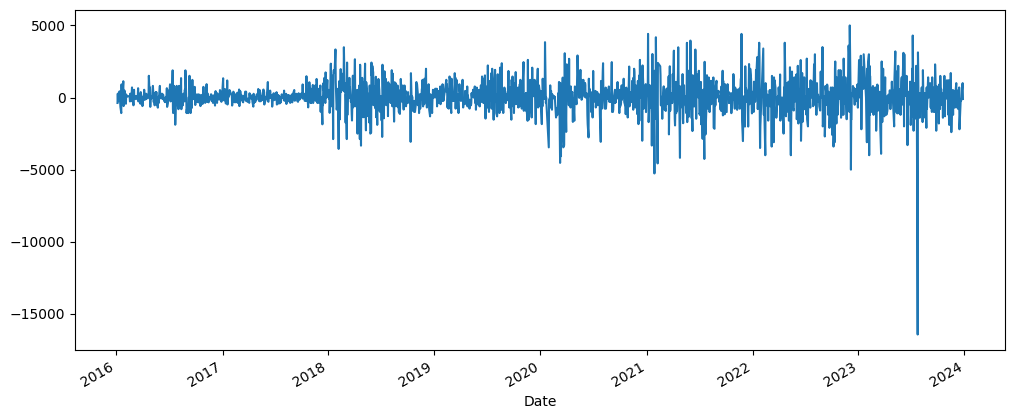

In [56]:
df['Price'].diff().plot(figsize=(12,5))

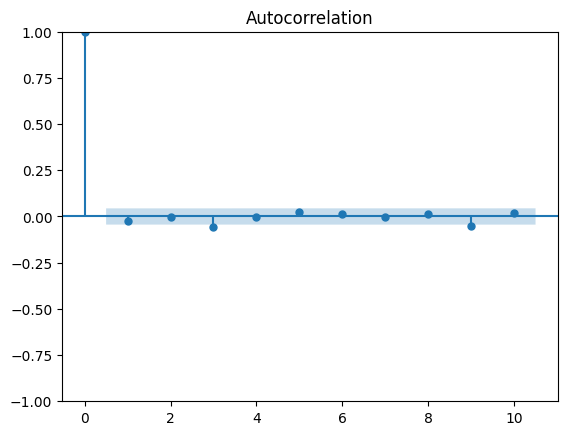

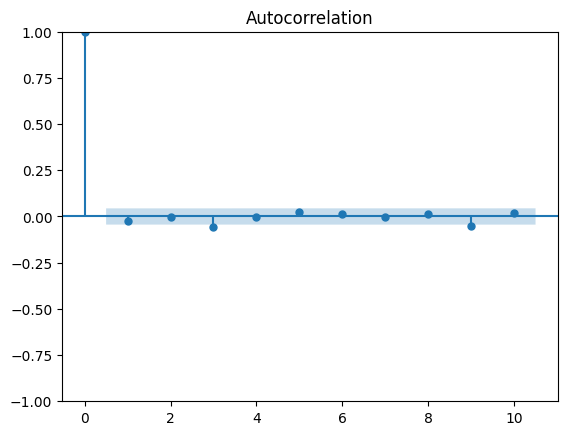

In [57]:
#ACF
sm.tsa.acf(np.diff(df['Price']), nlags=10)
sm.graphics.tsa.plot_acf(np.diff(df['Price']),lags=10)

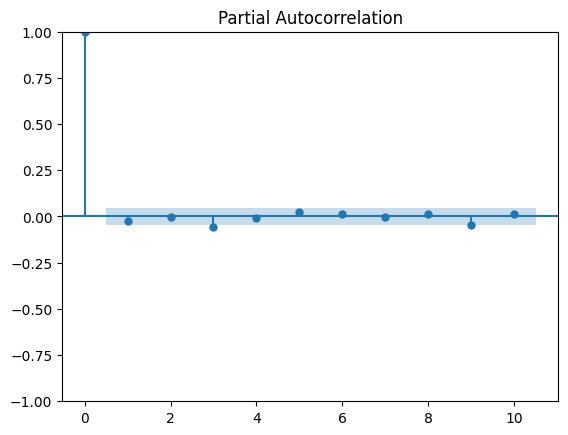

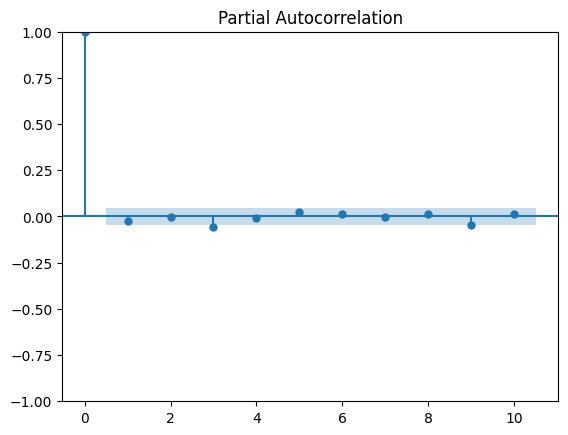

In [58]:
#PACF
sm.tsa.pacf(np.diff(df['Price']), nlags=10)
sm.graphics.tsa.plot_pacf(np.diff(df['Price']),lags=10)

In [59]:
#split training and testing (for model 7:3)
train_size1 = int(0.7 * len(df))
train1, test1 = df[:train_size1], df[train_size1:]

In [60]:
#split training and testing (for model 8:2)
train_size2 = int(0.8 * len(df))
train2, test2 = df[:train_size2], df[train_size2:]

In [61]:
#split training and testing (for model 9:1)
train_size3 = int(0.9 * len(df))
train3, test3 = df[:train_size3], df[train_size3:]

In [62]:
#using auto_arima for model Sarima 7:3
model73 = auto_arima(y = train1.Price,m=12)

In [63]:
#using auto_arima for model Sarima 8:2
model82 = auto_arima(y = train2.Price,m=12)

In [64]:
#using auto_arima for model Sarima 9:1
model91 = auto_arima(y = train3.Price,m=12)

In [65]:
#fitting 3 model
model73_fit = model73.fit(train1.Price)
model82_fit = model82.fit(train2.Price)
model91_fit = model91.fit(train3.Price)

In [66]:
#Prediction for model Sarima 7:3
predictions1 = pd.Series(model73.predict(n_periods = len(test1)))
predictions1.index = test1.index
predictions1

Date
2021-08-06     76993.451289
2021-08-09     77031.902579
2021-08-10     77070.353868
2021-08-11     77108.805158
2021-08-12     77147.256447
                  ...      
2023-12-21     99871.968481
2023-12-22     99910.419771
2023-12-25     99948.871060
2023-12-26     99987.322350
2023-12-27    100025.773639
Length: 600, dtype: float64

In [67]:
#Prediction for model Sarima 8:2
predictions2 = pd.Series(model82.predict(n_periods = len(test2)))
predictions2.index = test2.index
predictions2

Date
2022-05-30    77181.268475
2022-05-31    77353.642756
2022-06-01    77559.704615
2022-06-02    77497.261474
2022-06-03    77300.608342
                  ...     
2023-12-21    77396.851322
2023-12-22    77396.851322
2023-12-25    77396.851322
2023-12-26    77396.851322
2023-12-27    77396.851322
Length: 400, dtype: float64

In [68]:
#Prediction for model Sarima 9:1
predictions3 = pd.Series(model91.predict(n_periods = len(test3)))
predictions3.index = test3.index
predictions3

Date
2023-03-16    91437.930401
2023-03-17    91475.860802
2023-03-20    91513.791203
2023-03-21    91551.721604
2023-03-22    91589.652004
                  ...     
2023-12-21    98834.358575
2023-12-22    98872.288976
2023-12-25    98910.219376
2023-12-26    98948.149777
2023-12-27    98986.080178
Length: 200, dtype: float64

In [69]:
#Take the last data in the dataset
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[82700.]])

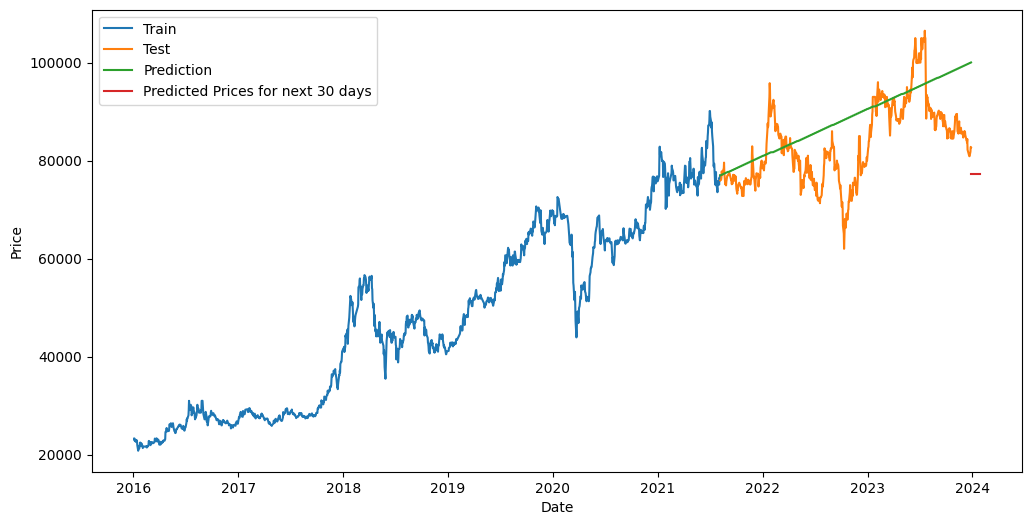

In [70]:
# Predict values for the next 30 days (model 7:3)
x_next_30_day_sarima1 = []

last_date = df.index[-1]

# Use the last known value in your dataset as the starting point
last_data = np.array(df['Price'].iloc[-1])

for i in range(30):
    # Predict using ARIMA model
    prediction = model73.predict(start=len(df), end=len(df) + i, dynamic=False)
    x_pred_next_sarima1 = prediction.values[-1]  # Access the values attribute instead of predicted_mean
    x_next_30_day_sarima1.append(x_pred_next_sarima1)

    # Update last_data for the next iteration
    last_data = np.array([x_pred_next_sarima1])

# Generate dates for the next 30 days
next_30_days1 = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

# Convert dates to a format compatible with your datetime index (if needed)
next_30_days_str1 = [date.strftime('%Y-%m-%d') for date in next_30_days1]

# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(train1.index, train1['Price'], label='Train')
plt.plot(test1.index, test1['Price'], label='Test')
plt.plot(predictions1.index, predictions1, label='Prediction')
plt.plot(next_30_days1, x_next_30_day_sarima1, label='Predicted Prices for next 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


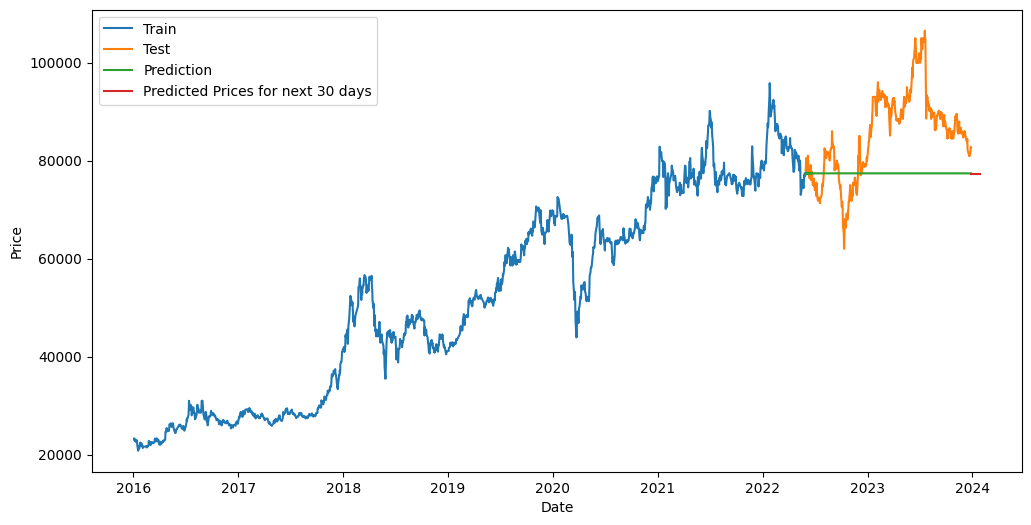

In [71]:
# Predict values for the next 30 days (model 8:2)
x_next_30_day_sarima2 = []

# Use the last known value in your dataset as the starting point
last_data = np.array(df['Price'].iloc[-1])

for i in range(30):
    # Predict using ARIMA model
    prediction2 = model82.predict(start=len(df), end=len(df) + i, dynamic=False)
    x_pred_next_sarima2 = prediction2.values[-1]  # Access the values attribute instead of predicted_mean
    x_next_30_day_sarima2.append(x_pred_next_sarima2)

    # Update last_data for the next iteration
    last_data = np.array([x_pred_next_sarima2])

# Generate dates for the next 30 days
next_30_days2 = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

# Convert dates to a format compatible with your datetime index (if needed)
next_30_days_str2 = [date.strftime('%Y-%m-%d') for date in next_30_days2]

# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(train2.index, train2['Price'], label='Train')
plt.plot(test2.index, test2['Price'], label='Test')
plt.plot(predictions2.index, predictions2, label='Prediction')
plt.plot(next_30_days2, x_next_30_day_sarima2, label='Predicted Prices for next 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


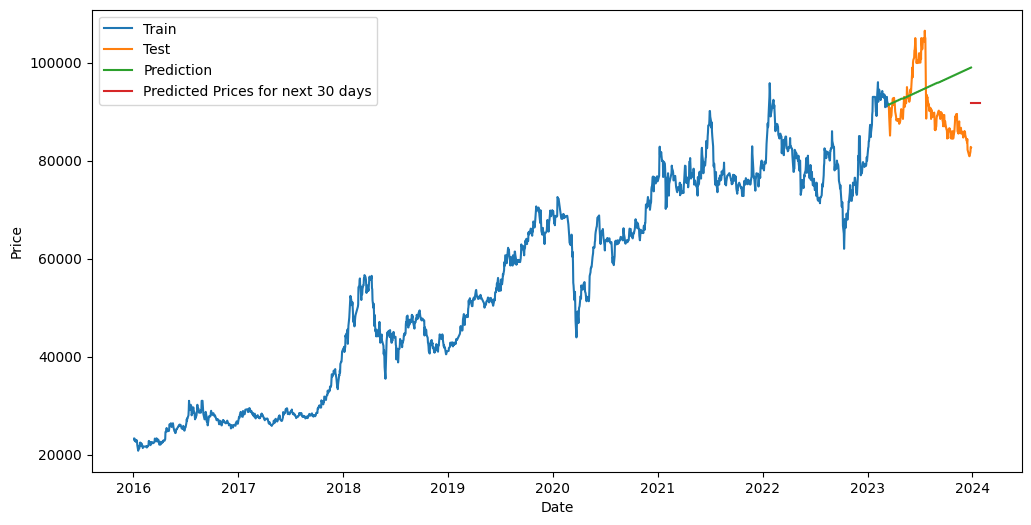

In [72]:
# Predict values for the next 30 days (model 9:1)
x_next_30_day_sarima3 = []

# Use the last known value in your dataset as the starting point
last_data = np.array(df['Price'].iloc[-1])

for i in range(30):
    # Predict using ARIMA model
    prediction3 = model91.predict(start=len(df), end=len(df) + i, dynamic=False)
    x_pred_next_sarima3 = prediction3.values[-1]  # Access the values attribute instead of predicted_mean
    x_next_30_day_sarima3.append(x_pred_next_sarima3)

    # Update last_data for the next iteration
    last_data = np.array([x_pred_next_sarima3])

# Generate dates for the next 30 days
next_30_days3 = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

# Convert dates to a format compatible with your datetime index (if needed)
next_30_days_str3 = [date.strftime('%Y-%m-%d') for date in next_30_days3]

# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(train3.index, train3['Price'], label='Train')
plt.plot(test3.index, test3['Price'], label='Test')
plt.plot(predictions3.index, predictions3, label='Prediction')
plt.plot(next_30_days3, x_next_30_day_sarima3, label='Predicted Prices for next 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [73]:
# Evaluate the accuracy (model 7:3)

sarima_mape1 = mean_absolute_percentage_error(test1.Price.values, predictions1.values) * 100
sarima_rmse1 = np.sqrt(np.mean((predictions1.values - test1.Price.values)**2))
sarima_msle1 = mean_squared_log_error(test1.Price.values, predictions1.values)

print("SARIMA MAPE:\t", sarima_mape1)
print("SARIMA MSLE:\t", sarima_msle1)
print("SARIMA RMSE:\t", sarima_rmse1)

SARIMA MAPE:	 8.579837848034499
SARIMA MSLE:	 0.010498797684014075
SARIMA RMSE:	 8642.09184530828


In [74]:
# Evaluate the accuracy (model 8:2)

sarima_mape2 = mean_absolute_percentage_error(test2.Price.values, predictions2.values) * 100
sarima_rmse2 = np.sqrt(np.mean((predictions2.values - test2.Price.values)**2))
sarima_msle2 = mean_squared_log_error(test2.Price.values, predictions2.values)

print("SARIMA MAPE:\t", sarima_mape2)
print("SARIMA MSLE:\t", sarima_msle2)
print("SARIMA RMSE:\t", sarima_rmse2)

SARIMA MAPE:	 10.814413759773862
SARIMA MSLE:	 0.018974883514696818
SARIMA RMSE:	 11717.529894306714


In [75]:
# Evaluate the accuracy (model 9:1)

sarima_mape3 = mean_absolute_percentage_error(test3.Price.values, predictions3.values) * 100
sarima_rmse3 = np.sqrt(np.mean((predictions3.values - test3.Price.values)**2))
sarima_msle3 = mean_squared_log_error(test3.Price.values, predictions3.values)

print("SARIMA MAPE:\t", sarima_mape3)
print("SARIMA MSLE:\t", sarima_msle3)
print("SARIMA RMSE:\t", sarima_rmse3)

SARIMA MAPE:	 8.233312630736984
SARIMA MSLE:	 0.008701150722744168
SARIMA RMSE:	 8609.31249118941
